In [1]:
import inference_helpers

import torch
from config import get_config

from sklearn.metrics import mean_squared_error

In [2]:
from importlib import reload
reload(inference_helpers)

<module 'inference_helpers' from 'c:\\Users\\obhlivoj\\DP\\System-Imbalance-Forecasting\\models\\transformer_future_lags\\inference_helpers.py'>

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
cfg = get_config()

import numpy as np

num_models = 1

Using device: cuda


In [7]:
params = ['d_ff', 'Nx', 'n_head', 'dropout', 'lr']

In [8]:
best_metrics, best_models_inds, data_dict = inference_helpers.get_best_model(cfg, './loss/runfinal_single_step', num_models = 1)
loss_validation, loss_cat, preds_gt = inference_helpers.validate_n_models(device, 'final_single_step', params, best_models_inds, eval_data="val")

MODEL EVAL - #1
--------------------


100%|██████████| 14/14 [00:00<00:00, 14.23it/s]


--------------------
Time-step	Error
1		15028.50


In [5]:
# import pickle

# with open('../_results_fl_val/transformer_fl_val_res.pkl', 'wb') as f:
#     pickle.dump(preds_gt, f)

In [9]:
res = inference_helpers.compute_val_errors(preds_gt, num_models = 1)

Step	RMSE	MAPE	MAE	R2
1	122.59	2.65	90.66	0.50


In [10]:
loss_validation, loss_cat, preds_gt = inference_helpers.validate_n_models(device, 'final_single_step', params, best_models_inds, eval_data="test")

MODEL EVAL - #1
--------------------


100%|██████████| 14/14 [00:00<00:00, 19.29it/s]


--------------------
Time-step	Error
1		12667.89


In [11]:
res = inference_helpers.compute_val_errors(preds_gt, num_models = 1)

Step	RMSE	MAPE	MAE	R2
1	112.55	3.27	83.22	0.53


In [13]:
res = inference_helpers.compute_val_errors(preds_gt, num_models = 1)

Step	RMSE	MAPE	MAE	R2
1	112.55	3.27	83.22	0.53


In [7]:
import pickle

with open('../_results_fl/transformer_fl_test_res.pkl', 'wb') as f:
    pickle.dump(preds_gt, f)

In [19]:
seq_data = inference_helpers.group_data(preds_gt)

rmse_data = np.empty(len(seq_data), dtype=np.float32)
for ind, dp in enumerate(seq_data):
    rmse_data[ind] = mean_squared_error(dp['true'], dp['pred'], squared=False)

# get k random, best and worst predictions
k = 3
min_loss_inds = np.argsort(rmse_data)[:k].tolist()
max_loss_inds = np.argsort(rmse_data)[-k:].tolist()
rand_inds = np.random.randint(0, len(rmse_data), size=k).tolist()

### Bad predictions

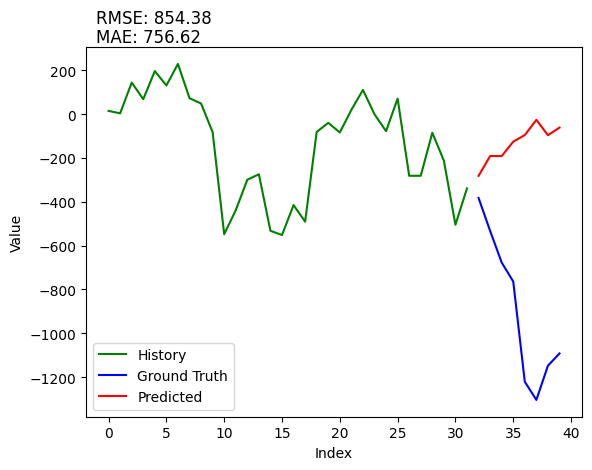

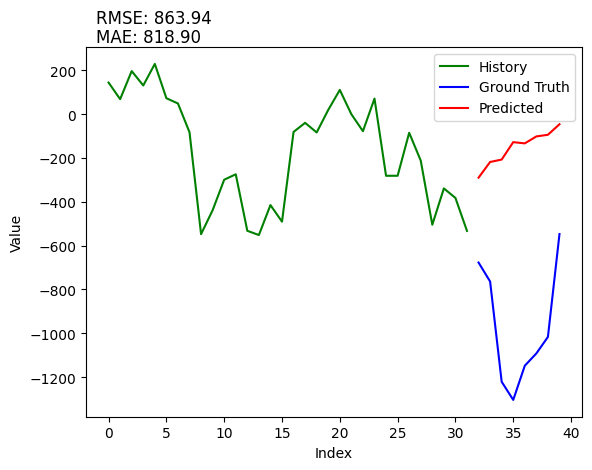

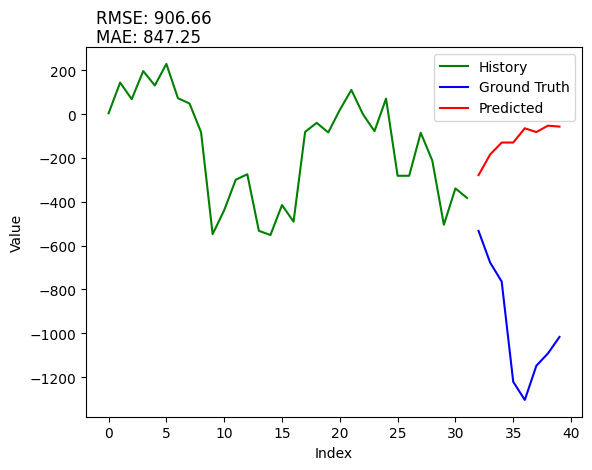

In [20]:
inference_helpers.plot_k_results(seq_data, max_loss_inds)

### Good predictions

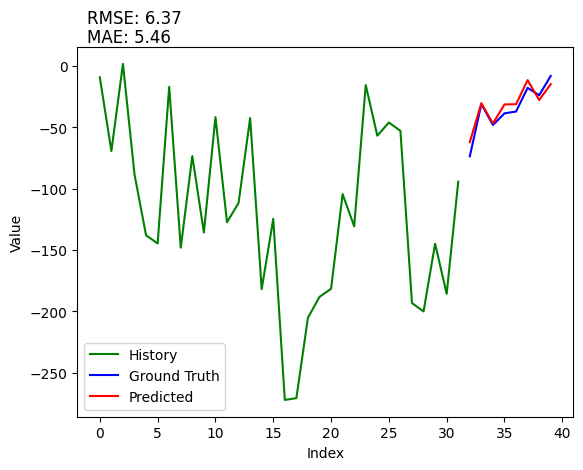

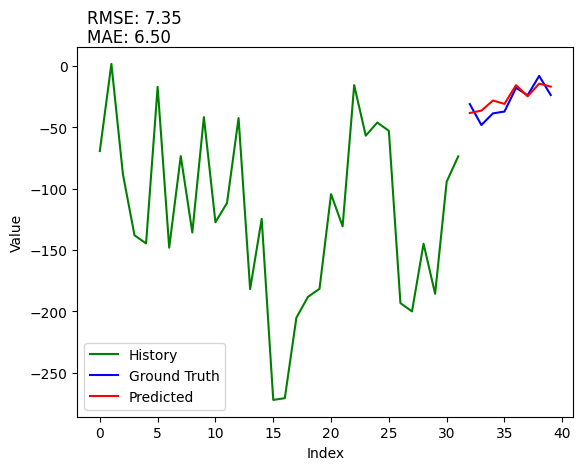

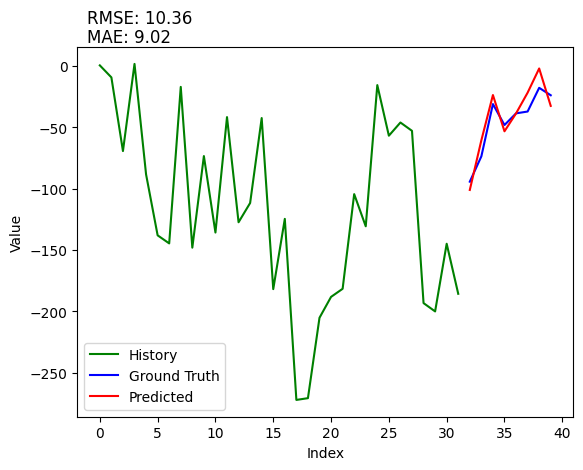

In [21]:
inference_helpers.plot_k_results(seq_data, min_loss_inds)

### Random predictions

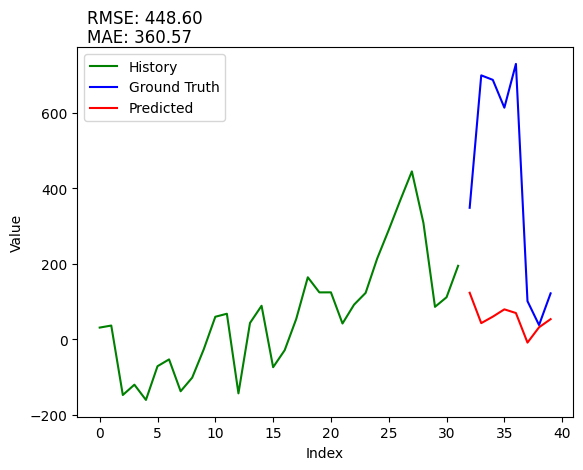

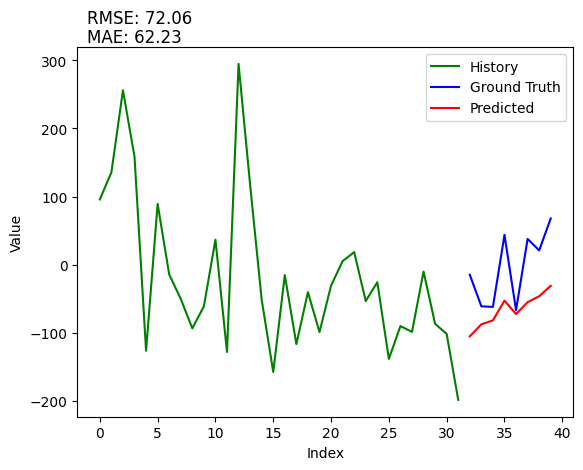

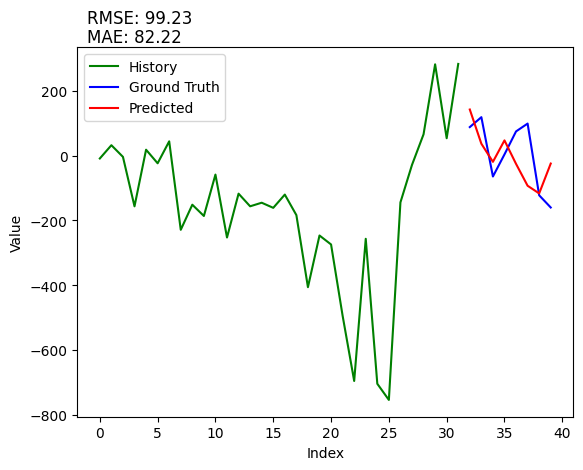

In [22]:
inference_helpers.plot_k_results(seq_data, rand_inds)